In [1]:
import pandas as pd
import numpy as np

In [2]:
sd = pd.read_csv('Smoking Data.csv')

In [3]:
sd.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [4]:
sd.shape

(1338, 6)

In [5]:
sd.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
for cl in sd.columns:
    if sd[cl].dtype == np.number:
        continue
    sd[cl] = le.fit_transform(sd[cl])

<ipython-input-7-417f9db1e626>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if sd[cl].dtype == np.number:


In [8]:
sd.head()

,region,age,sex,bmi,children,smoker
0,3,1,0,27.900,0,1
1,2,0,1,33.770,1,0
2,2,10,1,33.000,3,0
3,1,15,1,22.705,0,0
4,1,14,1,28.880,0,0


In [9]:
x = sd.drop(['smoker'], axis=1)
y = sd['smoker']

In [10]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=2)

In [11]:
xtrain.shape

(936, 5)

In [12]:
xtest.shape

(402, 5)

In [13]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier()

In [14]:
DecTree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [15]:
DecTree.predict(xtest)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
testing = DecTree.predict(xtest)

In [17]:
ytest.head()

17      0
1091    0
273     0
270     0
874     0
Name: smoker, dtype: int32

In [18]:
xtest['Predicted'] = testing

<ipython-input-18-67cf9c399c9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['Predicted'] = testing


In [19]:
xtest.head()

,region,age,sex,bmi,children,Predicted
17,0,5,1,23.845,0,0
1091,0,37,0,29.830,0,1
273,0,32,1,27.455,1,0
270,2,0,1,29.370,1,0
874,0,26,1,21.850,3,0


In [20]:
DecTree.predict([[2,37,1,21,3]])

array([0])

In [21]:
DecTree.predict([[0,38,1,29,1]])

array([1])

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(802.2406077348066, 1323.2368421052631, 'children <= 3.5\ngini = 0.325\nsamples = 936\nvalue = [745, 191]'),
 Text(643.2414364640885, 1251.7105263157896, 'sex <= 0.5\ngini = 0.331\nsamples = 906\nvalue = [716, 190]'),
 Text(340.0408839779006, 1180.1842105263158, 'bmi <= 46.365\ngini = 0.294\nsamples = 442\nvalue = [363, 79]'),
 Text(335.1082872928177, 1108.657894736842, 'bmi <= 28.542\ngini = 0.289\nsamples = 440\nvalue = [363, 77]'),
 Text(236.3407458563536, 1037.1315789473683, 'age <= 43.5\ngini = 0.351\nsamples = 185\nvalue = [143, 42]'),
 Text(205.7046961325967, 965.6052631578948, 'age <= 34.5\ngini = 0.334\nsamples = 179\nvalue = [141, 38]'),
 Text(159.2303867403315, 894.078947368421, 'bmi <= 28.29\ngini = 0.38\nsamples = 145\nvalue = [108, 37]'),
 Text(90.94475138121548, 822.5526315789474, 'age <= 2.5\ngini = 0.368\nsamples = 140\nvalue = [106, 34]'),
 Text(24.662983425414367, 751.0263157894736, 'age <= 1.5\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(19.73038674033

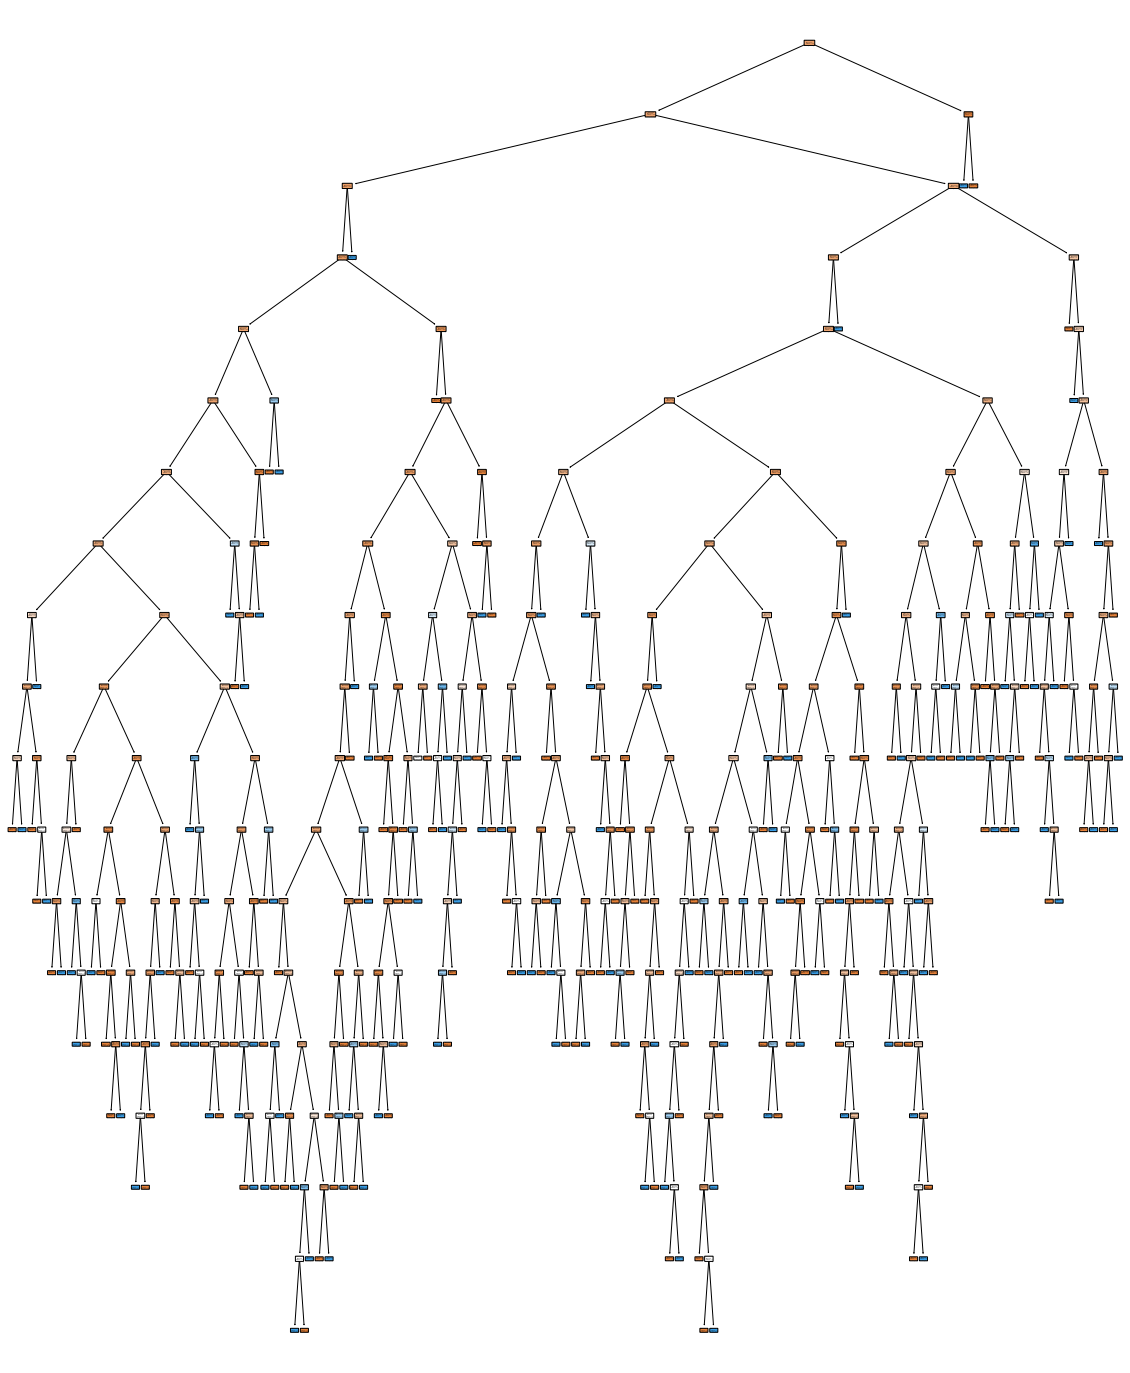

In [23]:
plt.figure(figsize=(20,25))
tree.plot_tree(DecTree, filled=True,rounded=True,feature_names=xtrain.columns)